In [2]:
import scraping_class
logfile = 'log.txt'## name your log file.
connector = scraping_class.Connector(logfile)
import requests
from bs4 import BeautifulSoup
from tqdm import tqdm_notebook

In [3]:
import pandas as pd
import numpy as np
import html5lib
import sys
import pickle
from tqdm import tqdm_notebook
import seaborn as sns

In [4]:
import matplotlib.pyplot as plt
from matplotlib import pyplot

In [5]:
with open('df_final.pkl', 'rb') as f:
    df = pickle.load(f)

In [6]:
df.columns.values

array(['Kursus', 'Fakultet', 'Institut', 'Termin', 'ECTS', 'Eksamenstype',
       'Antal tilmeldte', 'Fremmødte', 'Antal bestået',
       'Eksamensgennemsnit', 12, 10, 7, 4, 2, 0, -3, 'Ej mødt',
       'Ikke bestået', 'Year', 'ID', 'Re-exam_dummy', 'URL_E', 'level_0',
       'Course Name', 'Credit', 'Type of assessment', 'Aid',
       'Marking scale', 'Censorship form', 'Exam period', 'Re-exam',
       'Language', 'Course code', 'Level', 'Duration', 'Placement',
       'Schedule', 'Study board', 'Course id', 'Category', 'Lectures',
       'Preparation', 'Exam', 'Total', 'Content', 'Learning\r\nOutcome',
       'Class Instruction', 'Practical exercises',
       'Exam registration requirements', 'Field Work', 'Course capacity',
       'Seminar', 'Guidance', 'Continuing and further education', 'Price',
       'Class Seminar', 'Class Exercises', 'Study Groups', 'Exercises',
       'Exam Preparation', 'Excursions', 'Øvelseshold', 'Øvelser',
       'Course Preparation', 'Theory exercises', '

### Faculties

In [7]:
# note: no NaN's
print(df['Fakultet'].unique())

['Det Natur- og Biovidenskabelige Fakultet'
 'Det Samfundsvidenskabelige Fakultet' 'Det Humanistiske Fakultet'
 'Det Sundhedsvidenskabelige Fakultet' 'Det Juridiske Fakultet'
 'Det Teologiske Fakultet']


In [8]:
print(sum(df['Fakultet'] == 'Det Natur- og Biovidenskabelige Fakultet'))
print(sum(df['Fakultet'] == 'Det Samfundsvidenskabelige Fakultet'))
print(sum(df['Fakultet'] == 'Det Humanistiske Fakultet'))
print(sum(df['Fakultet'] == 'Det Sundhedsvidenskabelige Fakultet'))
print(sum(df['Fakultet'] == 'Det Juridiske Fakultet'))
print(sum(df['Fakultet'] == 'Det Teologiske Fakultet'))

5277
2225
1976
2869
1264
373


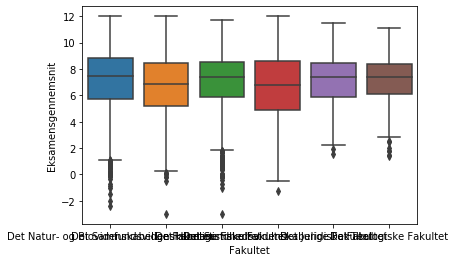

In [9]:
a4_dims = (20, 8.27)
#df = mylib.load_data()
#fig, ax = pyplot.subplots(figsize=a4_dims)
sns.boxplot(x='Fakultet', y='Eksamensgennemsnit', data=df)

In [32]:
df['Fakultet'].unique()

array(['Det Natur- og Biovidenskabelige Fakultet',
       'Det Samfundsvidenskabelige Fakultet', 'Det Humanistiske Fakultet',
       'Det Sundhedsvidenskabelige Fakultet', 'Det Juridiske Fakultet',
       'Det Teologiske Fakultet'], dtype=object)

C:\Users\jens_\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\jens_\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([   4.,   17.,  113.,  270.,  415.,  698., 1069., 1346.,  788.,
         154.]),
 array([-2.4, -0.96, 0.48, 1.9200000000000004, 3.36, 4.799999999999999,
        6.24, 7.68, 9.12, 10.559999999999999, 12.0], dtype=object),
 <a list of 10 Patch objects>)

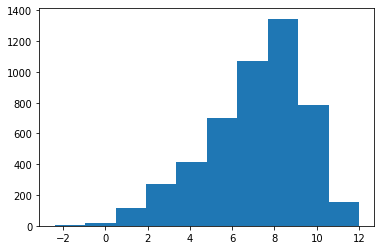

In [126]:
#Plotting the average distr. 

df_natur = df[df['Fakultet']=='Det Natur- og Biovidenskabelige Fakultet']
#titanic_v2=titanic[titanic['class']==gruppering]
plt.hist(df_natur['Eksamensgennemsnit'])

In [26]:
y_inner = []
y = []
x = ['-3','00','02','4','7','10','12']

# Looking at each faculty 
for i in tqdm_notebook(df['Fakultet'].unique()):
    df_faculty = df[df['Fakultet']==i]
   
    for k in [-3,0,2,4,7,10,12]:
        y_inner.append(df_faculty[k].sum(skipna = True)) #<= Do we have a list in a list
    
    y.append(y_inner)
    y_inner=[]

[[5899, 14306, 13294, 25233, 43837, 40131, 26589],
 [4427, 2913, 4351, 10436, 19351, 18126, 9993],
 [1859, 1721, 2316, 6332, 12236, 11929, 8080],
 [2800, 12295, 12721, 25081, 44330, 38920, 26456],
 [5632, 3067, 6047, 16093, 23007, 17043, 10103],
 [161, 274, 368, 706, 1290, 1162, 914]]

In [63]:
# calc frequencies 
y_freq_inner = []
y_freq = []

# running through each faculty
for i in range(len(y)):
    
    # calc frequencies 
    for q in range(len(y[i])):
        y_freq_inner.append(y[i][q]/sum(y[i]))

    y_freq.append(y_freq_inner)
    y_freq_inner = []

y_freq;

[4427, 2913, 4351, 10436, 19351, 18126, 9993]
5899


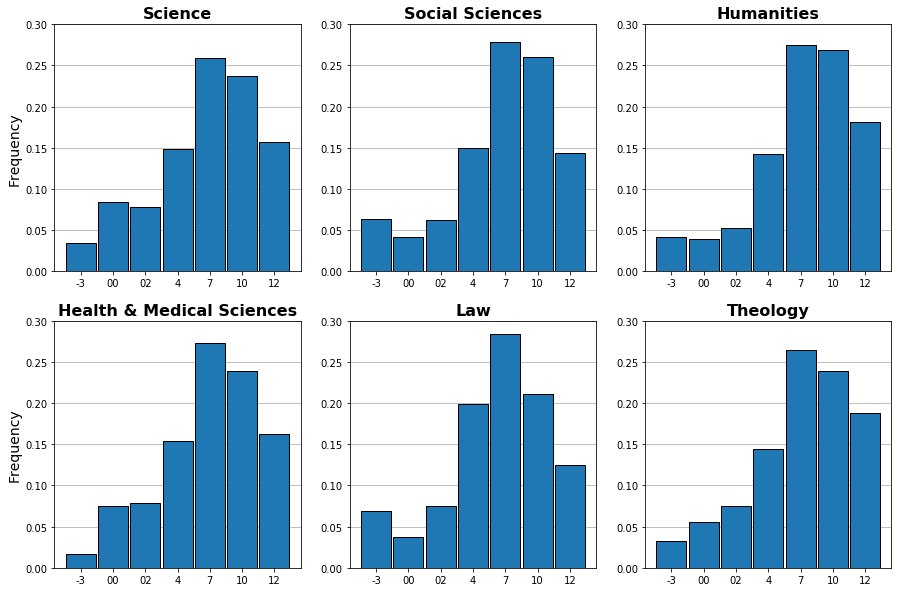

In [133]:
Faculty_names = ['Science','Social Sciences','Humanities','Health & Medical Sciences','Law','Theology']

f, ax = plt.subplots(figsize=(15,10))

plt.subplot(2, 3, 1)
plt.title(Faculty_names[0], fontsize = 16, weight = 'bold')
plt.ylim([0,0.30])
plt.grid(axis ='y',zorder=0)
plt.ylabel('Frequency',fontsize=14)
plt.bar(x, y_freq[0], width=0.93, edgecolor='black',zorder=3)

plt.subplot(2, 3, 2)
plt.title(Faculty_names[1], fontsize = 16, weight = 'bold')
plt.ylim([0,0.30])
plt.grid(axis ='y',zorder=0)
plt.bar(x, y_freq[1], width=0.93, edgecolor='black',zorder=3)

plt.subplot(2, 3, 3)
plt.title(Faculty_names[2], fontsize = 16, weight = 'bold')
plt.ylim([0,0.30])
plt.grid(axis ='y',zorder=0)
plt.bar(x, y_freq[2], width=0.93, edgecolor='black',zorder=3)

plt.subplot(2, 3, 4)
plt.title(Faculty_names[3], fontsize = 16, weight = 'bold')
plt.ylim([0,0.30])
plt.grid(axis ='y',zorder=0)
plt.ylabel('Frequency',fontsize=14)
plt.bar(x, y_freq[3], width=0.93, edgecolor='black',zorder=3)

plt.subplot(2, 3, 5)
plt.title(Faculty_names[4], fontsize = 16, weight = 'bold')
plt.ylim([0,0.30])
plt.grid(axis ='y',zorder=0)
plt.bar(x, y_freq[4], width=0.93, edgecolor='black',zorder=3)

plt.subplot(2, 3, 6)
plt.title(Faculty_names[5], fontsize = 16, weight = 'bold')
plt.ylim([0,0.30])
plt.grid(axis ='y',zorder=0)
plt.bar(x, y_freq[5], width=0.93, edgecolor='black',zorder=3)

f.savefig('histogram_gades_split_faculty.png')

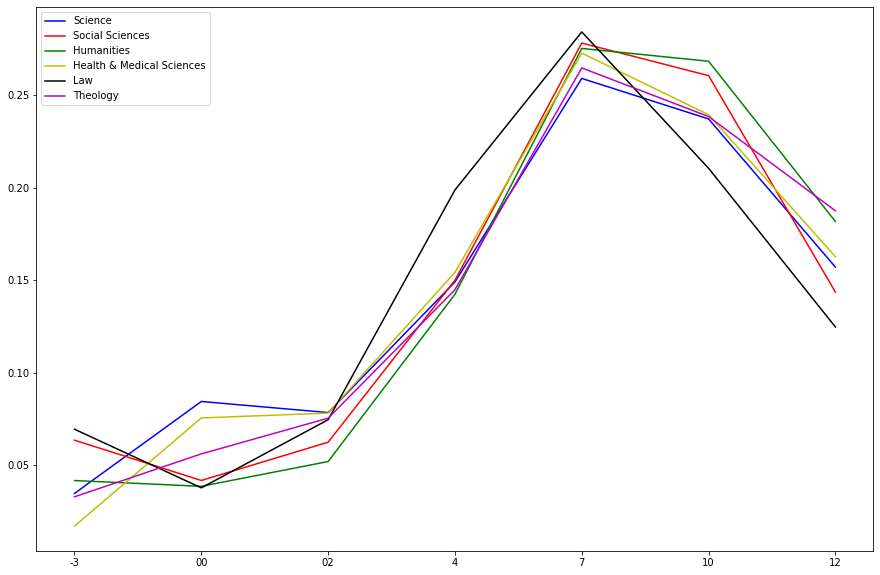

In [80]:
f, axs = plt.subplots(figsize=(15,10))


plt.plot(x, y_freq[0],'b-', label = Faculty_names[0])
plt.plot(x, y_freq[1],'r-',label = Faculty_names[1])
plt.plot(x, y_freq[2],'g-',label = Faculty_names[2])
plt.plot(x, y_freq[3], 'y-',label = Faculty_names[3])
plt.plot(x, y_freq[4],'k-',label = Faculty_names[4])
plt.plot(x, y_freq[5],'m-',label = Faculty_names[5])
plt.legend(loc='best')
plt.show()

### Economics

In [ ]:
y_inner = []
y = []
x = ['-3','00','02','4','7','10','12']

# Looking at each faculty 
for i in tqdm_notebook(df['Fakultet'].unique()):
    df_faculty = df[df['Fakultet']==i]
   
    for k in [-3,0,2,4,7,10,12]:
        y_inner.append(df_faculty[k].sum(skipna = True)) #<= Do we have a list in a list
    
    y.append(y_inner)
    y_inner=[]

In [138]:
df_polit = df[df['Institut']=='Økonomisk Institut']
print(len(df_polit))

727


In [141]:
y_polit = []

for k in [-3,0,2,4,7,10,12]:
    y_polit.append(df_polit[k].sum(skipna = True)) #<= Do we have a list in a list

y_polit

[1806, 2169, 2948, 5086, 7640, 6163, 3468]

In [144]:
y_polit_freq = []

# calc frequencies 
for q in range(len(y_polit)):
    y_polit_freq.append(y_polit[q]/sum(y_polit))
    
y_polit_freq

[0.06168032786885246,
 0.07407786885245901,
 0.10068306010928962,
 0.17370218579234972,
 0.2609289617486339,
 0.21048497267759564,
 0.11844262295081967]

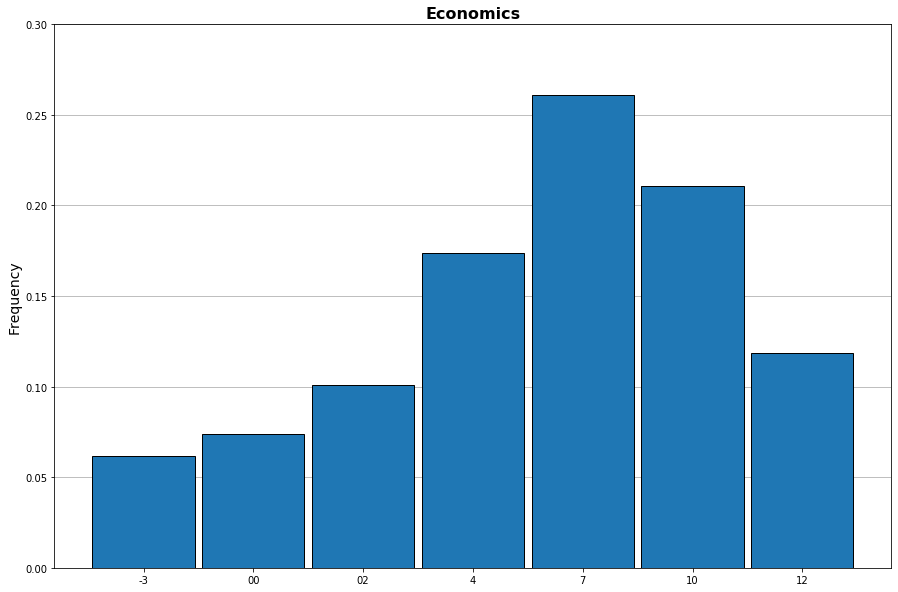

In [148]:
f, ax = plt.subplots(figsize=(15,10))

plt.subplot(1, 1, 1)
plt.title("Economics", fontsize = 16, weight = 'bold')
plt.ylim([0,0.30])
plt.grid(axis ='y',zorder=0)
plt.ylabel('Frequency',fontsize=14)
plt.bar(x, y_polit_freq, width=0.93, edgecolor='black',zorder=3)

f.savefig('histogram_gades_economics.png')